# Time series analysis of MNT/USD daily exchange rate

In this project, we explore the relationship between the exchange rate of the Mongolian Tögrög (MNT) to the United States Dollar (USD) and various economic indicators such as copper and coal prices, the Chinese Yuan (CNY) exchange rate, and the Shanghai stock index. The primary goal of the project is to build a GARCH model to forecast the MNT/USD exchange rate and analyze the conditional distribution of the log returns. We will also examine the effect of exogenous variables on the MNT/USD exchange rate and provide insight into the potential drivers of the exchange rate fluctuations.

Exogenous variables are variables that are outside of the system being studied but may still affect its behavior. In this case, the exogenous variables included in the analysis are copper prices, coal prices, Chinese currency exchange rates, Shanghai Composite stock prices, USD/CNY forward rates, and USD/CNY exchange rates.

These variables are potentially important because they can have an impact on the behavior of the endogenous variable, which is the USD/CNY exchange rate in this case. For example, if copper prices and coal prices are increasing, this could be an indication of increasing demand for raw materials, which may lead to increased manufacturing activity in China. This, in turn, could lead to increased demand for the Chinese currency, causing the USD/CNY exchange rate to decrease. Similarly, if the Shanghai Composite stock market index is performing well, this may indicate increased investor confidence in the Chinese economy, which could lead to increased demand for the Chinese currency and a decrease in the USD/CNY exchange rate.

By including these exogenous variables in the analysis, we can better understand the factors that may be driving changes in the USD/CNY exchange rate and potentially make more informed decisions based on this information.

## Data reading and preprocessing

The following code imports the pandas library and reads in data from several csv and excel files. The data includes historical prices for copper, coal, and the Shanghai stock exchange, as well as historical exchange rates between the Chinese yuan (CNY) and the US dollar (USD). The data is stored in separate dataframes for each variable of interest.

In [88]:
# import the pandas library
import pandas as pd

# read the copper_prices data from a csv file and store it in a dataframe called copper_prices
copper_prices = pd.read_csv('copper-prices-historical-chart-data.csv', )

# read the coal_prices data from a csv file and store it in a dataframe called coal_prices
coal_prices = pd.read_csv('Newcastle Coal Futures Historical Data.csv')

# read the chinese_currency data from an excel file and store it in a dataframe called chinese_currency
chinese_currency = pd.read_excel('currency-rate-CNY.xlsx')

# read the shanghai_stock data from a csv file and store it in a dataframe called shanghai_stock
shanghai_stock = pd.read_csv('Shanghai Composite Historical Data.csv')

# read the cny_usd_fwrates data from an excel file and store it in a dataframe called cny_usd_fwrates
cny_usd_fwrates = pd.read_excel('forward rates CNY-USD.xlsx')

# read the rate data from an excel file and store it in a dataframe called rate
rate = pd.read_excel('currency-rate-USD.xlsx')

This code block converts the 'date' column in each of the dataframes containing the historical prices and rates of various financial instruments from datetime format to string format with the 'YYYY-MM-DD' format. The dataframes are 'copper_prices', 'coal_prices', 'chinese_currency', 'shanghai_stock', 'cny_usd_fwrates', and 'rate'. This conversion is necessary for certain calculations and for merging the dataframes based on the date column.

In [89]:
# convert the 'date' column of the copper_prices dataframe to datetime format and then convert it to string format with 'YYYY-MM-DD' format
copper_prices['date'] = pd.to_datetime(copper_prices['date']).dt.strftime('%Y-%m-%d')

# convert the 'date' column of the coal_prices dataframe to datetime format and then convert it to string format with 'YYYY-MM-DD' format
coal_prices['date'] = pd.to_datetime(coal_prices['date']).dt.strftime('%Y-%m-%d')

# convert the 'date' column of the chinese_currency dataframe to datetime format and then convert it to string format with 'YYYY-MM-DD' format
chinese_currency['date'] = pd.to_datetime(chinese_currency['date']).dt.strftime('%Y-%m-%d')

# convert the 'date' column of the shanghai_stock dataframe to datetime format and then convert it to string format with 'YYYY-MM-DD' format
shanghai_stock['date'] = pd.to_datetime(shanghai_stock['date']).dt.strftime('%Y-%m-%d')

# convert the 'date' column of the cny_usd_fwrates dataframe to datetime format and then convert it to string format with 'YYYY-MM-DD' format
cny_usd_fwrates['date'] = pd.to_datetime(cny_usd_fwrates['date']).dt.strftime('%Y-%m-%d')

# convert the 'date' column of the rate dataframe to datetime format and then convert it to string format with 'YYYY-MM-DD' format
rate['date'] = pd.to_datetime(rate['date']).dt.strftime('%Y-%m-%d')


The code below is performing data merging and selection of specific columns from various dataframes. It begins with importing the pandas library and then reading data from various CSV and Excel files into separate dataframes, namely copper_prices, coal_prices, chinese_currency, shanghai_stock, cny_usd_fwrates, and rate.

Next, the code converts the 'date' column of each dataframe to datetime format and then to a string format with 'YYYY-MM-DD' format.

Afterward, the code merges the dataframes together based on the 'date' column using pd.merge(). Specifically, it merges copper_prices and coal_prices, then the merged dataframe with chinese_currency, followed by shanghai_stock, then cny_usd_fwrates, and finally rate. The resulting merged dataframe is stored in a variable named df.

Then, the code selects specific columns from the merged dataframe and creates a new dataframe called 'data' with these columns: date, copper_price, Coal_Price, CNY - China yuan, Shanghai_Price, usd/cny, and USD - US dollar.

In [90]:
# merge copper_prices and coal_prices dataframes based on date column
merged_df = pd.merge(copper_prices, coal_prices, on='date')

# merge merged_df with chinese_currency dataframe based on date column
merged_df2 = pd.merge(merged_df, chinese_currency, on='date')

# merge merged_df2 with shanghai_stock dataframe based on date column
merged_df3 = pd.merge(merged_df2, shanghai_stock, on='date')

# merge merged_df3 with cny_usd_fwrates dataframe based on date column
merged_df4 = pd.merge(merged_df3, cny_usd_fwrates, on='date')

# merge merged_df4 with rate dataframe based on date column
df = pd.merge(merged_df4, rate, on='date')

# select specific columns from merged dataframe and create a new dataframe
data = df[['date', 'copper_price', 'Coal_Price', 'CNY - China yuan', 'Shanghai_Price', 'usd/cny', 'USD - US dollar']]

# set the maximum number of rows to be displayed
pd.set_option('display.max_rows', 374)

# display the data dataframe
data

,date,copper_price,Coal_Price,CNY - China yuan,Shanghai_Price,usd/cny,USD - US dollar
0,2022-03-01,4.5965,313.00,454.21,3488.83,6.3500,2867.69
1,2022-03-02,4.6655,440.00,454.69,3484.19,6.3511,2869.97
2,2022-03-03,4.7815,370.00,454.31,3481.11,6.3558,2871.15
3,2022-03-04,4.9375,418.75,454.57,3447.65,6.3591,2873.32
4,2022-03-07,4.7310,422.65,454.94,3372.86,6.3613,2874.58
5,2022-03-08,4.7100,423.15,454.94,3293.53,6.3505,2874.58
6,2022-03-09,4.5725,420.65,455.27,3256.39,6.3552,2876.32
7,2022-03-10,4.6525,373.35,455.31,3296.09,6.3574,2877.78
8,2022-03-11,4.6255,368.65,456.16,3309.75,6.3623,2883.17
9,2022-03-14,4.5230,361.75,454.81,3223.53,6.3862,2892.70


The code below creates a new dataframe with a continuous date range from March 1, 2022 to March 10, 2023. Then, it merges the new dataframe with an existing dataframe using a left join. After that, it interpolates missing values in the merged dataframe and fills remaining NaN values with the mean of the numeric columns. Finally, it prints information about the merged and interpolated dataframe, including column names, data types, and non-null value counts.

In [91]:
# Create a new dataframe with a continuous date range
start_date = '2022-03-01'
end_date = '2023-03-10'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
new_df = pd.DataFrame({'date': date_range})

# Merge the new dataframe with the original dataframe using a left join
df = pd.merge(new_df['date'].dt.strftime('%Y-%m-%d'), data, on='date', how='left')

# Interpolate missing values in the DataFrame df
df = df.interpolate()

# Fill remaining NaN values with the mean of the numeric columns in the DataFrame df
df.fillna(df.mean(numeric_only=True), inplace = True)

# Print information about the DataFrame df, including column names, data types, and non-null value counts
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              375 non-null    object 
 1   copper_price      375 non-null    float64
 2   Coal_Price        375 non-null    float64
 3   CNY - China yuan  375 non-null    float64
 4   Shanghai_Price    375 non-null    float64
 5   usd/cny           375 non-null    float64
 6   USD - US dollar   375 non-null    float64
dtypes: float64(6), object(1)
memory usage: 23.4+ KB


## Data analysis

The code below displays histograms for the variables in the dataframe df. Histograms are a type of bar graph that show the distribution of a dataset by grouping data into "bins" and displaying the frequency or count of observations in each bin. These histograms can provide insights into the distribution, skewness, and outliers in each variable, which can inform further analysis and modeling. The figsize parameter sets the size of the figure that displays the histograms.

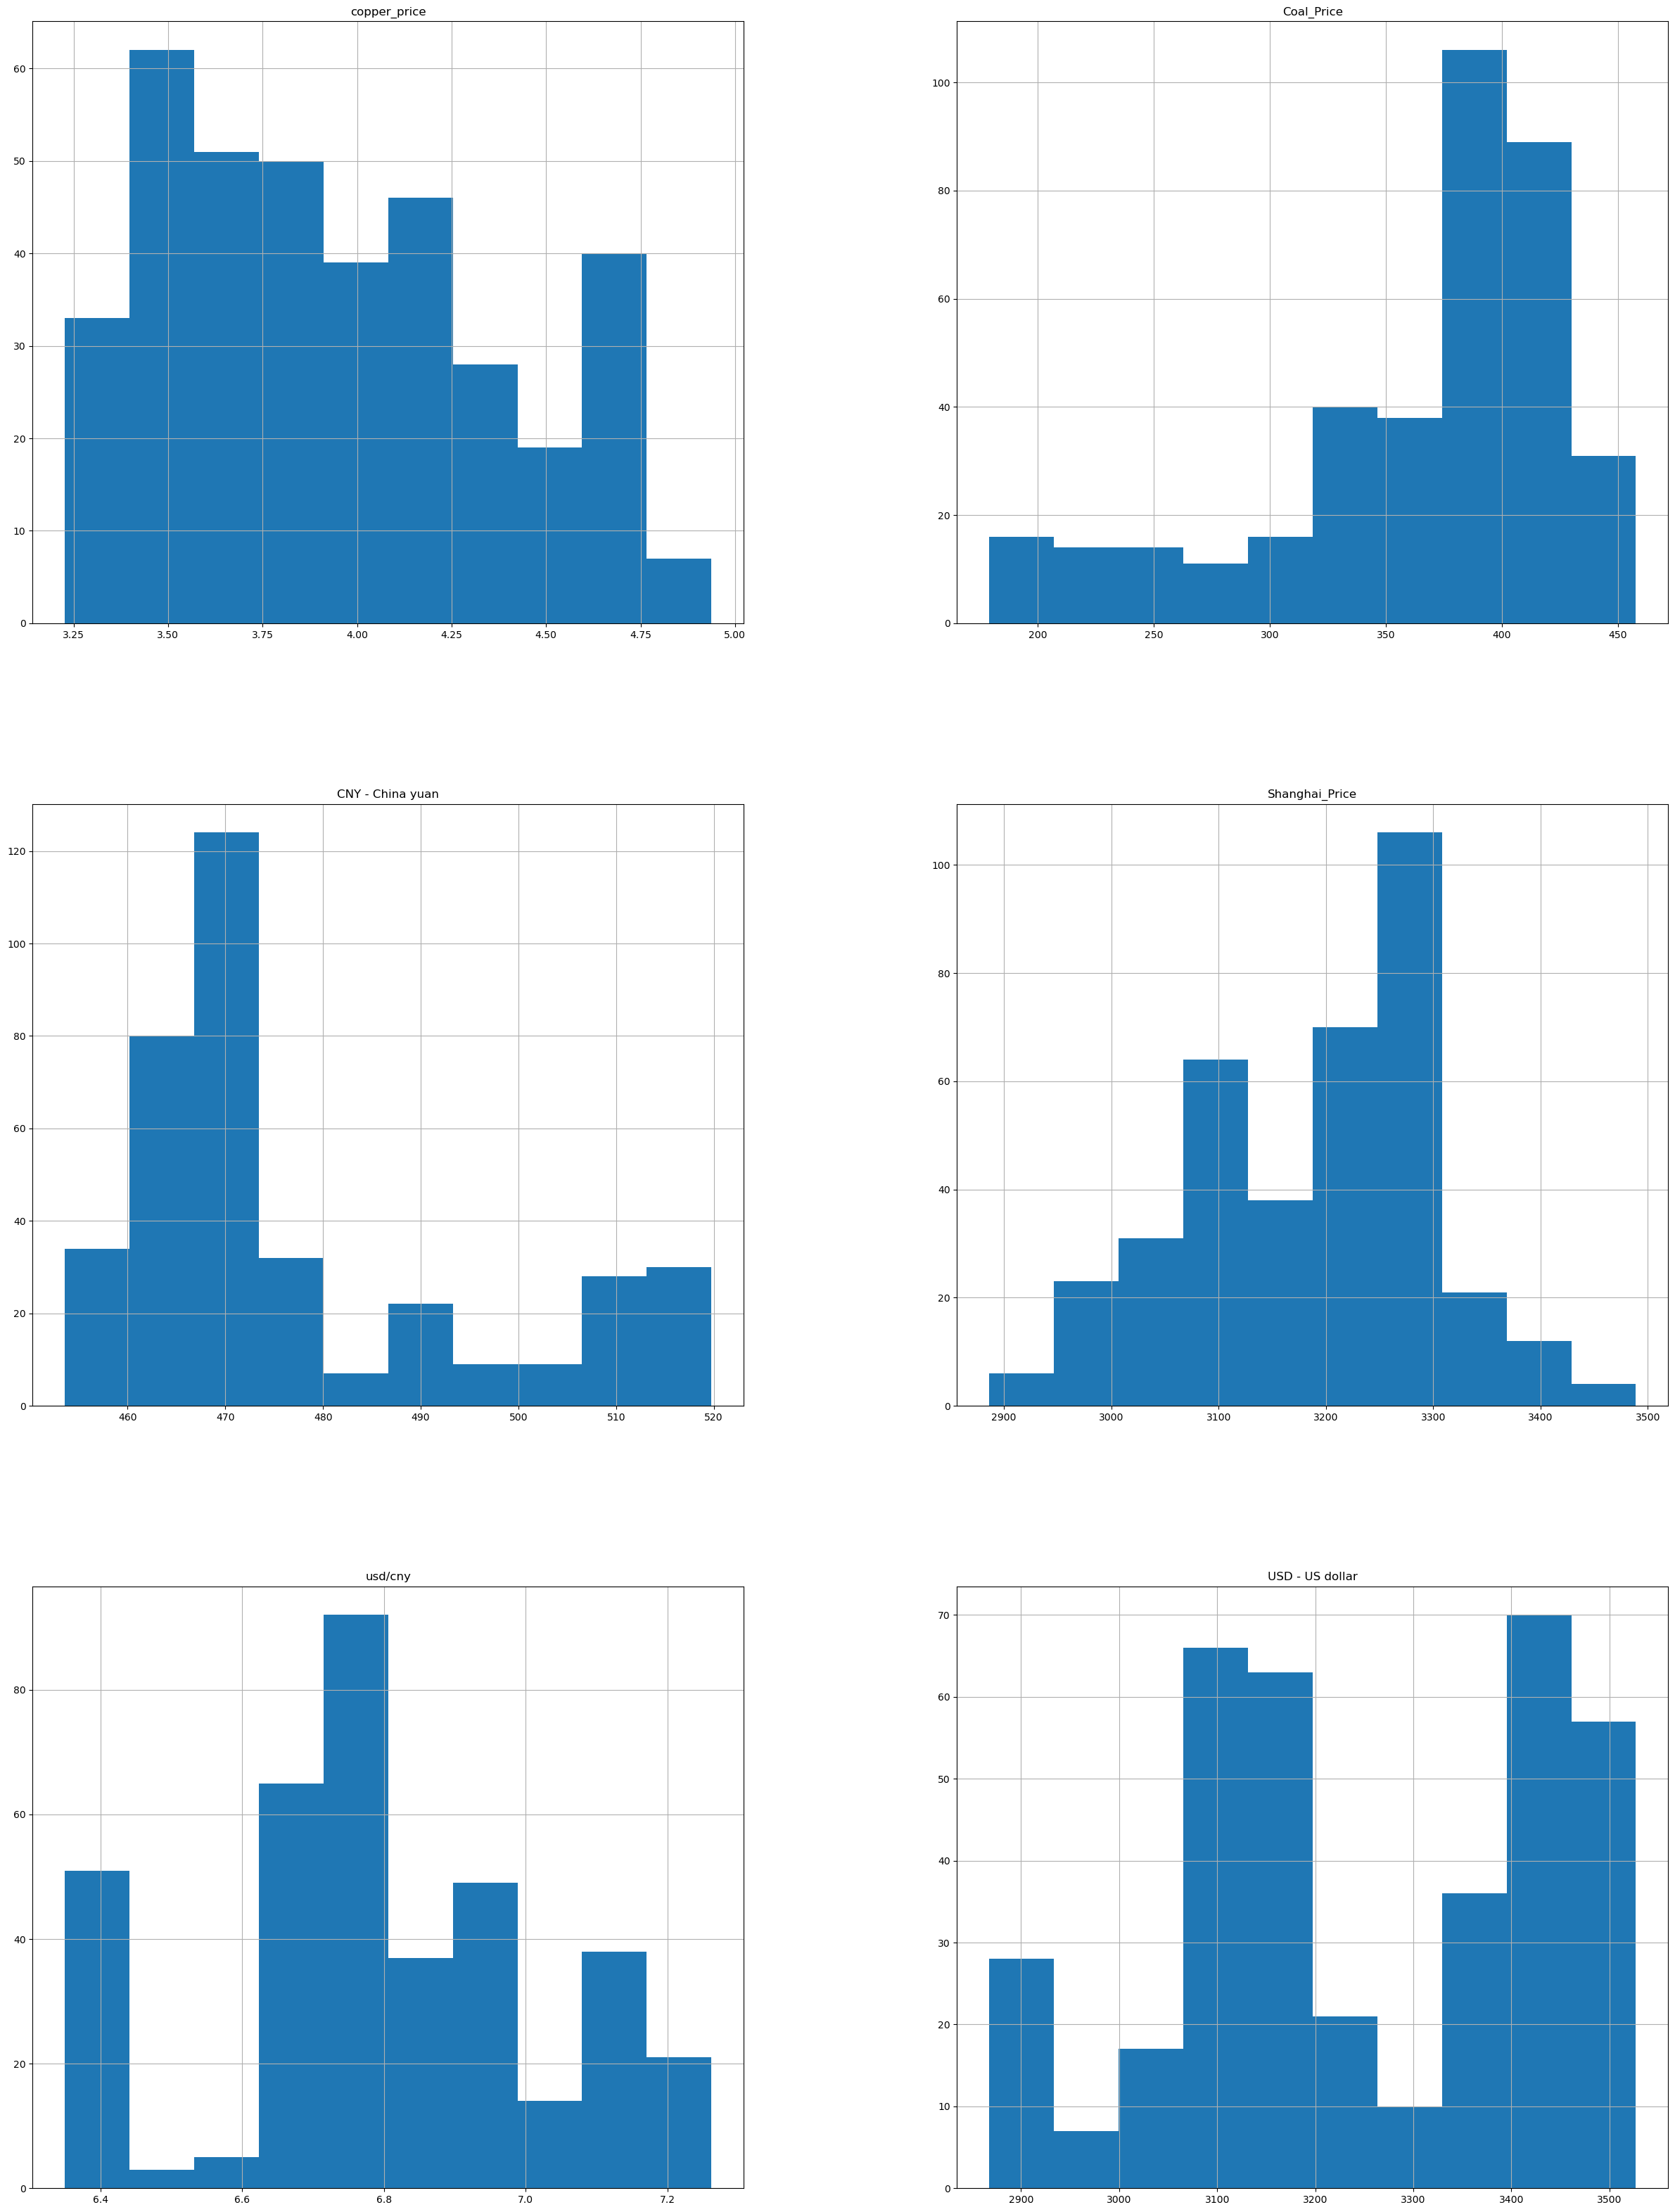

In [92]:
# Displaying histograms of the df variables
df.hist(figsize = (30,40));

The code below imports the Seaborn library and uses it to create a correlation matrix for the variables in the dataframe df. The correlation matrix shows how strongly each variable is correlated with every other variable in the dataframe. The matrix is then plotted as a heatmap, where darker colors indicate stronger positive correlations and lighter colors indicate weaker or negative correlations. This can help identify which variables are highly correlated with each other and may have a significant impact on each other's values.

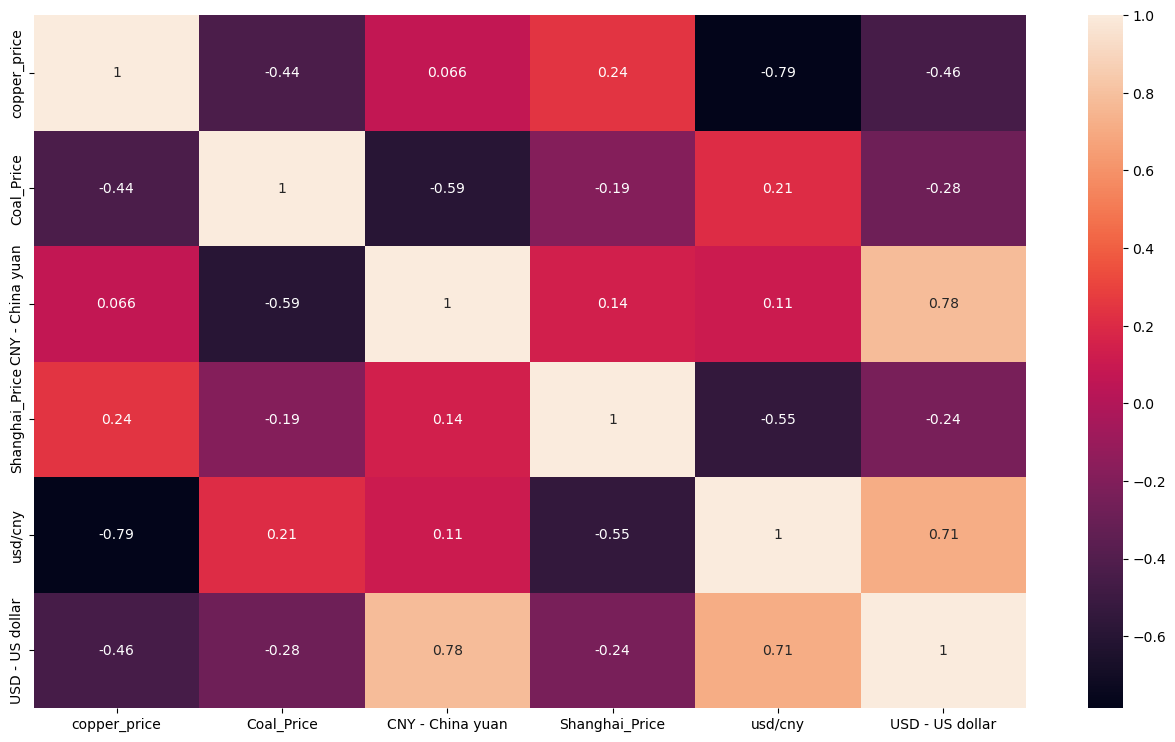

In [93]:
# Import Seaborn library
import matplotlib.pyplot as plt
import seaborn as sns

# Defining the correlation matrix
corr_matrix = df.corr()

# Plotting the correlation matrix as heatmap
plt.figure(figsize = (16,9))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## GARCH Model

In financial time series analysis, it is often useful to model the mean and volatility of asset returns. One common approach to modeling the volatility of asset returns is through the use of GARCH (Generalized Autoregressive Conditional Heteroscedasticity) models. In this example, we use an AR-X - GARCH model to analyze the relationship between a set of predictor variables and the log returns of an asset. The AR-X - GARCH model combines an autoregressive (AR) component, an exogenous (X) component, and a GARCH component to model the mean and volatility of asset returns. We run the model on a dataset of 371 observations and interpret the results to gain insights into the factors driving the volatility of the asset returns.

In [98]:
# Import necessary libraries
import numpy as np
import arch
from sklearn.preprocessing import StandardScaler

# Compute the daily log returns of MNT/USD
df['log_returns'] = np.log(df['USD - US dollar']).diff()
df.dropna(inplace = True)

# Define the exogenous variables
exog_vars = df[['copper_price', 'Coal_Price', 'CNY - China yuan', 'Shanghai_Price', 'usd/cny', 'USD - US dollar']]

# Define the GARCH model with exogenous variables
model = arch.arch_model(df['log_returns'], mean='ARX', lags=1, vol='GARCH', dist='Normal', 
                        x=exog_vars, rescale=True)

# Fit the model
results = model.fit()

# Print the summary
print(results.summary())

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7.797446762009255e+20
Iteration:      2,   Func. Count:     35,   Neg. LLF: 26402418.469548985
Iteration:      3,   Func. Count:     51,   Neg. LLF: 15617282425.156773
Iteration:      4,   Func. Count:     68,   Neg. LLF: 16714.89001224112
Iteration:      5,   Func. Count:     85,   Neg. LLF: 1354.1153957578213
Iteration:      6,   Func. Count:     98,   Neg. LLF: 5889256784770.6875
Iteration:      7,   Func. Count:    111,   Neg. LLF: 6626.461006450674
Iteration:      8,   Func. Count:    124,   Neg. LLF: 1890.2735974721058
Iteration:      9,   Func. Count:    138,   Neg. LLF: 1973.5367654334773
Iteration:     10,   Func. Count:    151,   Neg. LLF: 18662.62620113264
Iteration:     11,   Func. Count:    166,   Neg. LLF: 1528.762178912813
Iteration:     12,   Func. Count:    179,   Neg. LLF: 1177.269933029846
Iteration:     13,   Func. Count:    193,   Neg. LLF: 7829.124885850423
Iteration:     14,   Func. Count:    206,   Neg. LLF: 

The results above show the output of an AR-X - GARCH model, which is a type of time series model used to analyze financial data. The model has been estimated using maximum likelihood estimation (MLE) with normal distribution assumptions.

The summary output provides several key pieces of information that are used to interpret and evaluate the model fit.

Firstly, the "Optimization terminated successfully (Exit mode 0)" message indicates that the optimization algorithm has converged to a solution, which is a good sign.

The "Current function value" indicates the value of the log-likelihood function at the estimated parameter values. In this case, the log-likelihood is -262.377.

The "Iterations" and "Function evaluations" indicate the number of iterations and function evaluations required by the optimization algorithm to converge to the solution.

The "Gradient evaluations" indicate the number of times the gradient of the log-likelihood function has been evaluated during the optimization process.

The next section of the output provides details on the model itself. The "Dep. Variable" specifies the dependent variable of the model, which in this case is "log_returns". The "R-squared" and "Adj. R-squared" values indicate the goodness of fit of the mean model, which is an AR-X model in this case. The R-squared is 0.048, which means that the model explains only a small amount of the variation in the dependent variable. The Adj. R-squared is slightly lower at 0.033, indicating that the model has some overfitting.

The "Vol Model" specifies the volatility model used in the analysis, which is a GARCH model in this case. The "Distribution" specifies the distributional assumption made for the dependent variable, which is a normal distribution.

The "Method" specifies the estimation method used, which is maximum likelihood estimation (MLE) in this case. The "AIC" and "BIC" values are information criteria used to evaluate the model fit. The lower these values, the better the model fit.

The "No. Observations" indicates the number of observations used in the estimation.

The "Df Residuals" and "Df Model" specify the degrees of freedom for the residual and model, respectively.

The next section of the output provides details on the mean model. The "Mean Model" specifies the type of mean model used in the analysis, which is an AR-X model in this case. The coefficients of the mean model are reported in the table. The "Const" coefficient is the intercept term, and the "log_returns[1]" coefficient is the autoregressive (AR) coefficient for the first lag of the dependent variable. The remaining coefficients are the exogenous variables used in the analysis, including "copper_price", "Coal_Price", "CNY - China yuan", "Shanghai_Price", and "usd/cny".

The last section of the output provides details on the volatility model. The "Volatility Model" specifies the type of volatility model used in the analysis, which is a GARCH model in this case. The coefficients of the volatility model are reported in the table, including the "omega" coefficient, which is the constant term, and the "alpha[1]" and "beta[1]" coefficients, which are the parameters for the ARCH and GARCH effects, respectively.

The "Covariance estimator" specifies the method used to estimate the covariance matrix of the estimated parameters, which is robust in this case.

Overall, the model fit is not very good, as the R-squared is low and the AIC and BIC are relatively high. The model could benefit from additional exogenous variables or a different functional form for the mean or volatility model.

Substituting the values from the model summary into the AR-X - GARCH model equations, we get:

Mean Model:

$y_t = 10.2683 + 200.8162y_{t-1} - 0.4666(copper\_price) - 0.00076485(Coal\_Price) + 0.0015694(CNY) - 0.0011011(Shanghai\_Price) - 0.7565(usd/cny) + \epsilon_t$

Volatility Model:

$\sigma^2_t = 0.0037608 + 0.2075\epsilon^2_{t-1} + 0.7925\sigma^2_{t-1}$

where all the variables and coefficients are defined as in the equations above and are taken from the model summary.

### Plotting the results

The code `fig = results.plot(annualize="D")` generates a plot of the fitted values, residuals, conditional volatility, and standardized residuals for a GARCH model. The option `annualize="D"` specifies that the plot should display the results in daily time units.

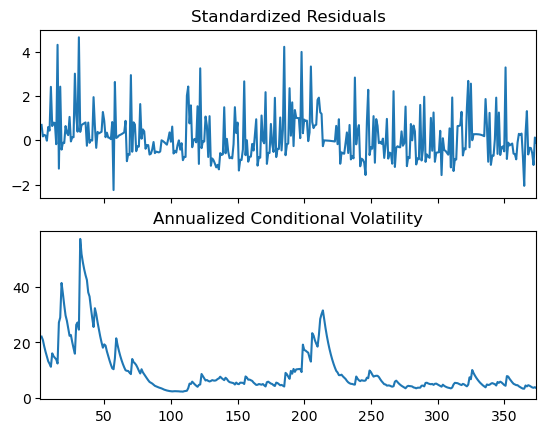

In [99]:
fig = results.plot(annualize="D")

### Plotting conditional distribution curve for 2023-03-10

This code uses a GARCH model to compute the conditional distribution of MNT/USD log returns on a specific date. The conditional distribution is plotted using a standard normal distribution curve, and the 10% Value at Risk (VaR) is indicated with green dashed lines. The code also plots two red dashed lines representing the 10% VaR calculated using the GARCH model parameters.

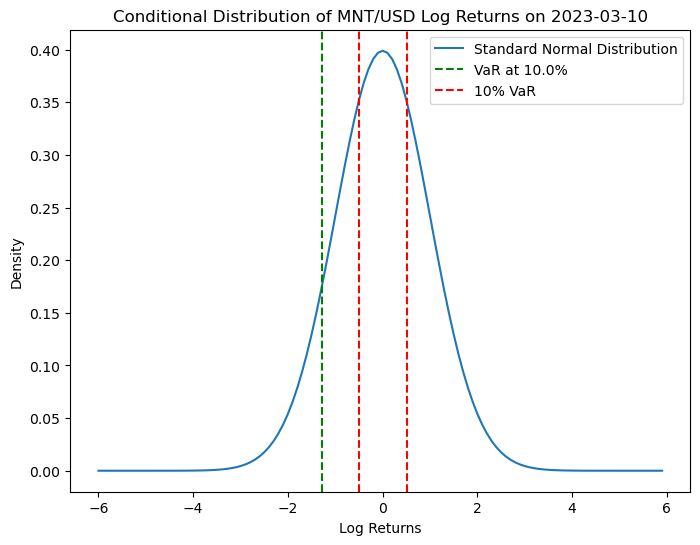

In [103]:
from scipy import stats
from arch.__future__ import reindexing


# Select the date for which to plot the conditional distribution curve
date = [np.datetime64('2023-03-10')]
exog_forecast = {'copper_price': np.array([4.0064]), 'Coal_Price': np.array([185.25]), 'CNY - China yuan': np.array([506.33]), 'Shanghai_Price': np.array([3230.08]), 'usd/cny': np.array([6.9179]), 'USD - US dollar': np.array([3527.070000])}

# Obtain the fitted values and residuals for the selected date
forecast = results.forecast(start=date, horizon=1, x=exog_forecast)
fitted_values = forecast.mean.iloc[-1]
residuals = forecast.residual_variance.iloc[-1]**0.5 * np.random.normal(size=1)

# Compute the conditional distribution of the residuals using the GARCH model parameters
cond_var = forecast.variance.iloc[-1] / results.scale
cond_std = np.sqrt(cond_var)
z = residuals / cond_std
cond_dist = stats.norm.pdf(z) / cond_std

# Plot the conditional distribution curve and indicate the 10% VaR in both tails
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.arange(-6, 6, 0.1), stats.norm.pdf(np.arange(-6, 6, 0.1)), label='Standard Normal Distribution')
var_level = 0.1
var_value = stats.norm.ppf(var_level, loc=0, scale=1)
ax.axvline(x=var_value, color='g', linestyle='--', label=f'VaR at {var_level*100:.1f}%')
ax.set_title(f'Conditional Distribution of MNT/USD Log Returns on {date[0]}')
ax.set_ylabel('Density')
ax.set_xlabel('Log Returns')
ax.axvline(x=-results.params[-1] * np.sqrt(252) / np.sqrt(results.scale) * 1.282, color='red', linestyle='--', label='10% VaR')
ax.axvline(x=results.params[-1] * np.sqrt(252) / np.sqrt(results.scale) * 1.282, color='red', linestyle='--')
ax.legend()
plt.show()


Based on the analysis of the GARCH model, we have obtained estimates of the parameters that describe the volatility of the MNT/USD exchange rate. The model indicates that there is persistence in the volatility of this exchange rate, meaning that current levels of volatility are likely to persist into the future. The conditional distribution of the residuals of the model follows a standard normal distribution, which means that deviations from the expected value are likely to be symmetrically distributed around the mean.

The red lines at +/- 0.5 represent the 10% Value at Risk (VaR) for the MNT/USD log returns, indicating that there is a 10% chance that the log returns may fall outside of this range. The green line at -1.28 also represents the 10% VaR for the MNT/USD log returns, but calculated using a different method. The units for these numbers are in log returns. In layman's terms, this means that on the selected date, the MNT/USD log returns were expected to remain within the range of +/- 0.5 with a 90% probability, and there was a 10% chance that the log returns may fall outside of this range and could potentially reach as low as -1.28.